   temperature  heat_index  humidity  pressure  wind_direction  wind_speed  \
0           48        1.21        59     30.46          177.39        5.62   
1           48        1.21        58     30.46          176.78        3.37   
2           48        1.23        57     30.46          158.75        3.37   
3           48        1.21        60     30.46          137.71        3.37   
4           48        1.17        62     30.46          104.95        5.62   

   precipitation  gust_speed  sealevel_pressure  Outcome  
0            101        3.37              29.68        1  
1            101        7.87              30.13        0  
2            102        9.00              30.49        1  
3            102        6.75              30.45        0  
4            102        6.75              30.33        1  
(32686, 10)


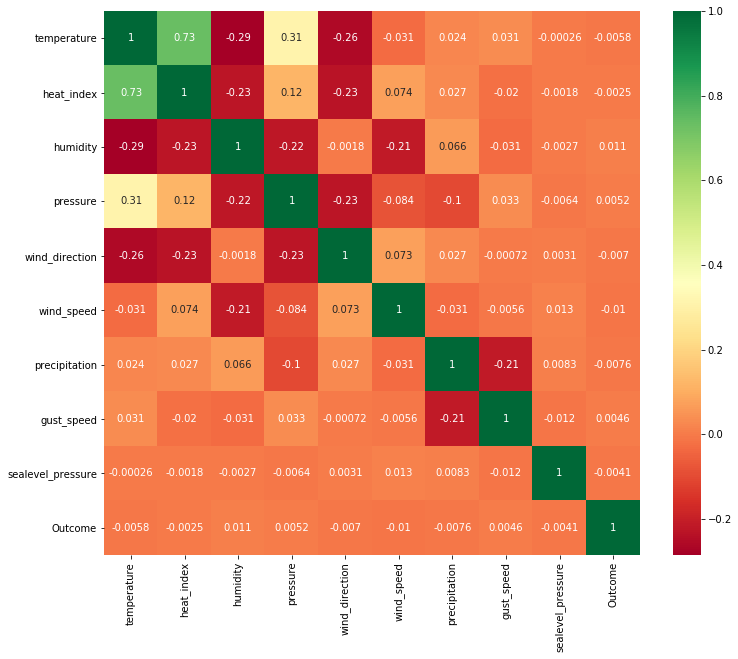

<bound method NDFrame.head of        temperature  heat_index  humidity  pressure  wind_direction  \
0        -0.500439   -0.651811 -0.616253  0.678974        0.407620   
1        -0.500439   -0.651811 -0.654730  0.678974        0.400285   
2        -0.500439   -0.651748 -0.693206  0.678974        0.183490   
3        -0.500439   -0.651811 -0.577776  0.678974       -0.069497   
4        -0.500439   -0.651938 -0.500823  0.678974       -0.463407   
...            ...         ...       ...       ...             ...   
32681    -1.145490   -0.651780  1.038241  0.130250        0.023209   
32682    -1.145490   -0.651938  1.038241 -0.052658       -0.309138   
32683    -1.145490   -0.651843  1.038241 -0.052658        0.020443   
32684    -1.145490   -0.651748  0.999764 -0.052658        0.248901   
32685    -1.145490   -0.651843  0.999764  0.130250       -0.720242   

       wind_speed  precipitation  gust_speed  sealevel_pressure  
0       -0.178738       0.999764   -0.823359          -0.189350

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

dataframe = pd.read_csv('weatherdata.csv')

print(dataframe.head(5))
print(dataframe.shape)


weather_data = dataframe.copy(deep=True)
# weather_data[['temperature','heat_index','humidity','pressure','wind_direction','wind_speed','precipitation','gust_speed','sealevel_pressure']] = diabetes_data[['temperature','heat_index','humidity','pressure','wind_direction','wind_speed','precipitation','gust_speed','sealevel_pressure']].replace(0,np.NaN)
'''
histogram_data = weather_data.hist(figsize = (20,20))
print(histogram_data)
sns.pairplot(weather_data,hue='Outcome')
plt.show()

sns.FacetGrid(weather_data, hue="Outcome", size=5) \
   .map(sns.distplot, "humidity") \
   .add_legend()
plt.show()
'''


# p = missingno.bar(dataframe)
# plt.show()

# p=pd.plotting.scatter_matrix(dataframe,figsize=(25, 25))
# plt.show()



#HEAT MAPS
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(weather_data.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap
plt.show()

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(weather_data.drop(["Outcome"],axis = 1),),
        columns=['temperature','heat_index','humidity','pressure','wind_direction','wind_speed','precipitation','gust_speed','sealevel_pressure'])

print(X.head)

# X = X.drop('Outcome',axis = 1)
Y = weather_data.Outcome



from sklearn.model_selection import train_test_split
X_Train , X_Test, Y_Train  , Y_Test = train_test_split(X,Y,test_size = 1/3,random_state=42,stratify = Y)


from sklearn import linear_model

train_score = []
test_score = []

regression = linear_model.LinearRegression()
regression.fit(X_Train,Y_Train)

train_score.append(regression.score(X_Train,Y_Train))
test_score.append(regression.score(X_Test,Y_Test))

print("Test Score is ",test_score)
print("Train Score is ",train_score)
print("accuracy is ",abs(train_score[0]/test_score[0]))
